### **Objective:** Develop algorithms to classify genetic mutations into different classes based on clinical evidence (text)

We will start with first exploring our data files - training_variants and training_text. Data exploration will help to decide the path for model building more accurately

In [1]:
#Importing the libraries 
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from textblob import TextBlob as tb

We will now read all the data files as Pandas dataframes and print their dimensions

In [2]:
#First we will take a look at our data summary

train_variants_df = pd.read_csv("C:/Users/AJ186043/Desktop/WORK/Kaggle Competitions/Cancer Treatment/Dataset/training_variants")
test_variants_df = pd.read_csv("C:/Users/AJ186043/Desktop/WORK/Kaggle Competitions/Cancer Treatment/Dataset/test_variants")
train_text_df = pd.read_csv("C:/Users/AJ186043/Desktop/WORK/Kaggle Competitions/Cancer Treatment/Dataset/training_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
test_text_df = pd.read_csv("C:/Users/AJ186043/Desktop/WORK/Kaggle Competitions/Cancer Treatment/Dataset/test_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
print("Train Variant".ljust(15), train_variants_df.shape)
print("Train Text".ljust(15), train_text_df.shape)
print("Test Variant".ljust(15), test_variants_df.shape)
print("Test Text".ljust(15), test_text_df.shape)

Train Variant   (3321, 4)
Train Text      (3321, 2)
Test Variant    (5668, 3)
Test Text       (5668, 2)


Now we will see the columns present in both training_variants and training_text files

In [3]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


So we come to know that both our files have a common column i.e. ID column. Other than this the training_variants file has 4 columns - ID, Gene, Variation and class respectively. While trainin_text file had ID and Text columns.

In [5]:
train_variants_df.isnull()

,ID,Gene,Variation,Class
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


Now in the next step we are going to calculate the unique count for all the columns in the training_variants file.

In [6]:
#We will calculate the count of unique values in training_variants file using unique() function

print("For training data, there are a total of", len(train_variants_df.ID.unique()), "IDs,", end='')
print(len(train_variants_df.Gene.unique()), "unique genes,", end='')
print(len(train_variants_df.Variation.unique()), "unique variations and ", end='')
print(len(train_variants_df.Class.unique()),  "classes")

For training data, there are a total of 3321 IDs,264 unique genes,2996 unique variations and 9 classes


So we get that we have 9 unique classes in which the data needs to be categorized. Let us calculate the frequency for all these 9 classes to better understand them.

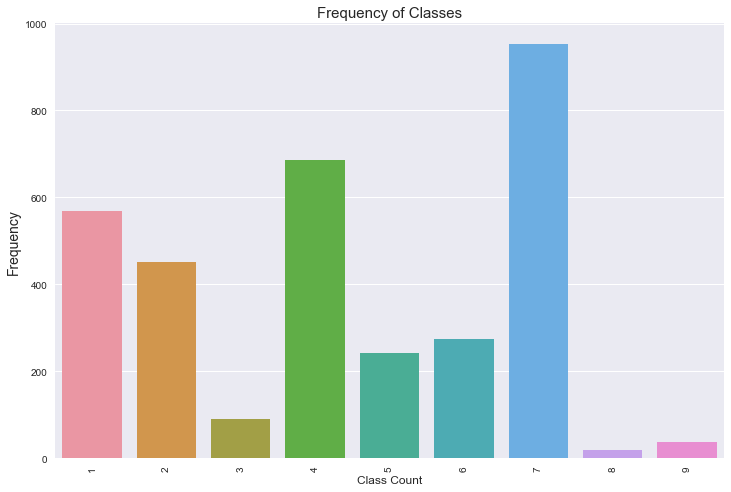

In [7]:
#Calculating the frequency for each class

plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=train_variants_df)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

The above graph shows that class 7 has the highest frequency, followed by class 4, class 1 and so on. Class 8 has the least frequency.
Now we are going to see the count for each Gene type present in the data.

In [8]:
#Lets see the number of times a particular gene occures in our data

gene_group = train_variants_df.groupby("Gene")['Gene'].count()
max_occ_genes = gene_group.sort_values(ascending=False)
print("Genes with maximal occurences\n", gene_group.sort_values(ascending=False))

Genes with maximal occurences
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
FGFR3      39
MLH1       35
MET        33
JAK2       33
SMAD4      33
NOTCH1     31
AKT1       28
PTPN11     26
ROS1       26
ABL1       26
         ... 
IL7R        1
INPP4B      1
JUN         1
KDM5A       1
LATS2       1
LATS1       1
MYOD1       1
FGF4        1
RICTOR      1
FGF3        1
CDKN2C      1
CEBPA       1
RARA        1
RAD54L      1
RAD51D      1
CTLA4       1
RAD51B      1
DUSP4       1
EIF1AX      1
EPCAM       1
PPM1D       1
PMS1        1
PIK3R3      1
PAX8        1
ERRFI1      1
PAK1        1
FAM58A      1
FANCC       1
FGF19       1
KLF4        1
Name: Gene, Length: 264, dtype: int64


So we see that the Gene type BRCA1 has the highest count of occurence. We will now take out the top 10 genes (on the basis of their occurence count) and plot them.

In [9]:
max_occ_top = max_occ_genes[:10]

In [10]:
max_occ_top

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

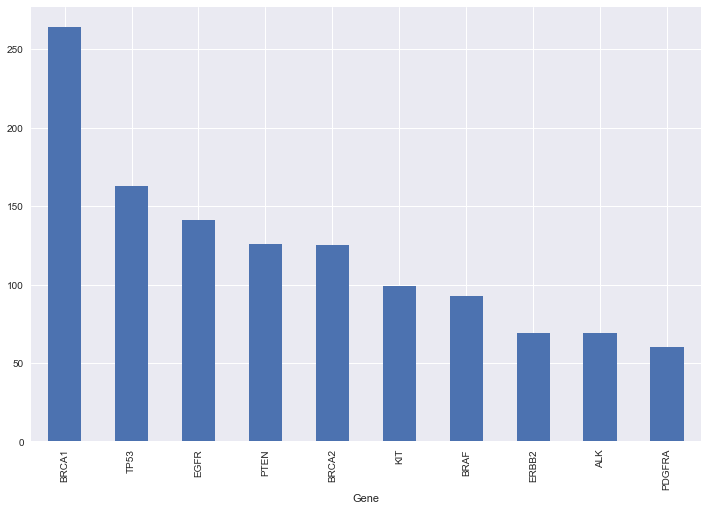

In [11]:
#Plotting the top 10 genes according to count 

plt.figure(figsize=(12,8))
max_occ_top.plot(kind='bar')

So the above graph gives us top 10 genes according to their frequencies. We can see that the Gene named BRCA1 has the highest frequency in the overall data followed by TP53, EGFR and so on. 

In [12]:
class_group = train_variants_df.groupby("Class")['Gene'].count()
occ_genes = class_group.sort_values(ascending=False)

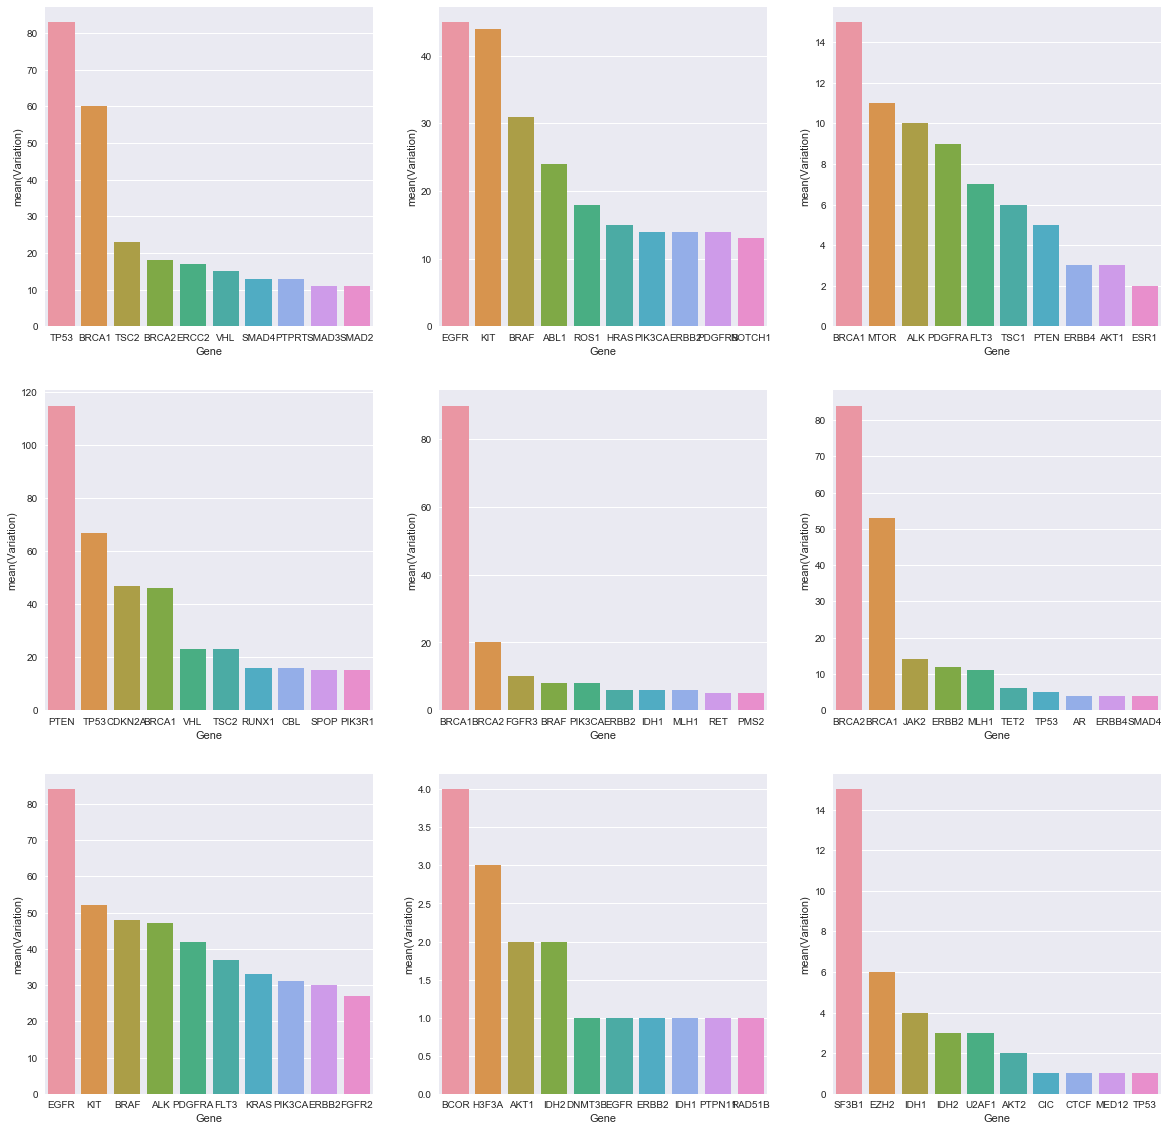

In [13]:
#Plotting the genes for all 9 classes

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

for i in range(3):
    for j in range(3):
        gene_count_grp = train_variants_df[train_variants_df["Class"]==((i*3+j)+1)].groupby('Gene')["Variation"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('Variation', ascending=False)
        sorted_gene_group_top_10 = sorted_gene_group[:10]
        sns.barplot(x="Gene", y="Variation", data=sorted_gene_group_top_10, ax=axs[i][j])      

So we conclude the following :

1. BRCA1 is the gene with highest frequency and it appears the most in Class 5
2. TP53 is the gene with the second highest frequency and it appears the most in Class 1

### Lets now explore the training_text file

In [14]:
train_text_df.isnull()

,ID,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [15]:
train_text_df.loc[:, 'Text_count']  = train_text_df["Text"].apply(lambda x: len(x.split()))
train_text_df.head()

,ID,Text,Text_count
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,Abstract Background Non-small cell lung canc...,5722
2,2,Abstract Background Non-small cell lung canc...,5722
3,3,Recent evidence has demonstrated that acquired...,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,6202


In [16]:
train_full = train_variants_df.merge(train_text_df, how="inner", left_on="ID", right_on="ID")
train_full.head()

,ID,Gene,Variation,Class,Text,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5722
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5722
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202


In [17]:
count_grp = train_full.groupby('Class')["Text_count"]
count_grp.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1,568.0,9444.705986,6513.636387,1.0,4970.00,7286.5,12868.25,52970.0
2,452.0,9306.362832,7624.322787,116.0,4184.25,6810.0,12209.50,61923.0
3,89.0,6751.157303,3724.432760,1737.0,4283.00,5572.0,7415.00,27371.0
4,686.0,8978.202624,7276.259637,53.0,4566.00,6351.0,11521.75,43893.0
5,242.0,7504.462810,3890.263510,183.0,5245.00,6451.0,9513.50,24214.0
6,275.0,7143.069091,3827.975473,1.0,4505.50,6587.0,7626.00,24597.0
7,953.0,11437.911857,10105.202594,1.0,4871.00,8254.0,14620.00,76708.0
8,19.0,10810.105263,5645.073662,2111.0,5586.00,11237.0,15535.00,20612.0
9,37.0,12798.567568,10208.668344,1146.0,4942.00,10917.0,15797.00,45126.0


In [18]:
train_full[train_full["Text_count"]==1.0]

,ID,Gene,Variation,Class,Text,Text_count
1109,1109,FANCA,S1088F,1,null,1
1277,1277,ARID5B,Truncating Mutations,1,null,1
1407,1407,FGFR3,K508M,6,null,1
1639,1639,FLT1,Amplification,6,null,1
2755,2755,BRAF,G596C,7,null,1


In [19]:
train_full.drop(train_full[train_full["Text_count"]==1.0].index, inplace=True)

In [20]:
train_full

,ID,Gene,Variation,Class,Text,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5722
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5722
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...,6202
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...,6202
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,14684
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...,11923
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...,5721


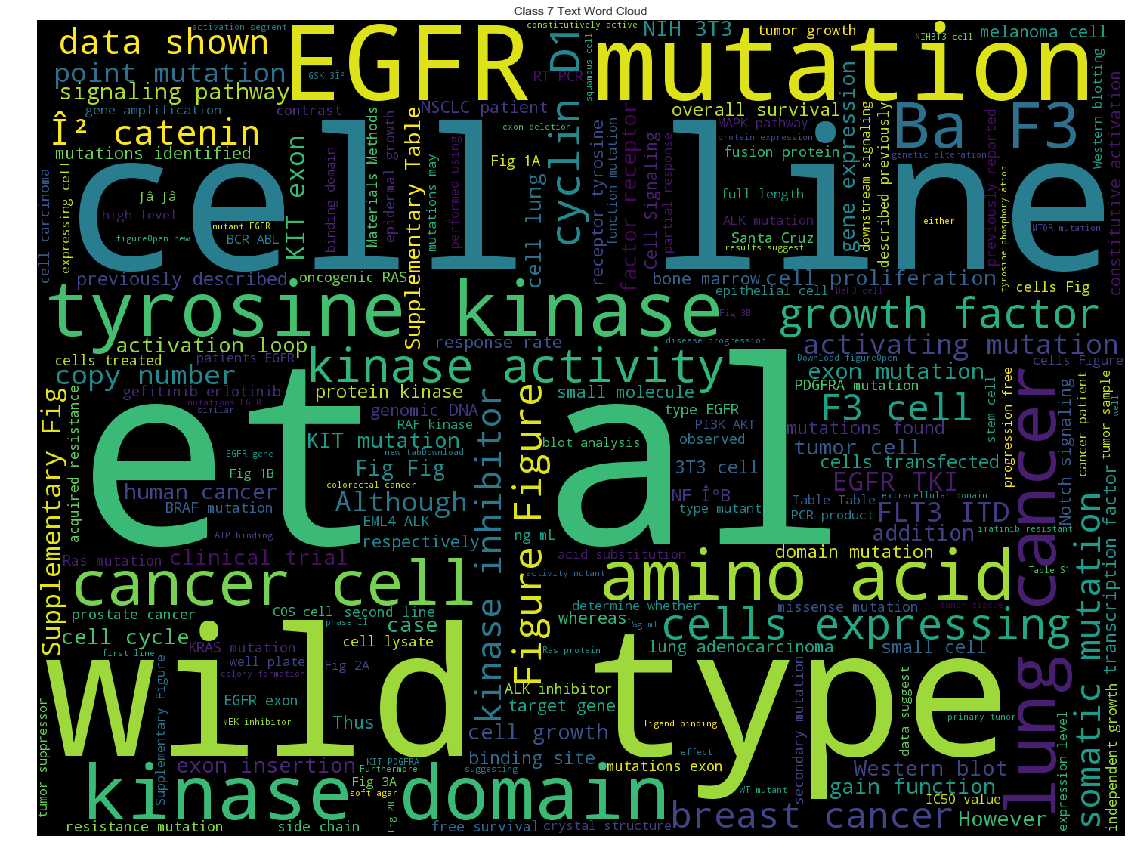

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_full[train_full.Class == 7]['Text']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Class 7 Text Word Cloud')

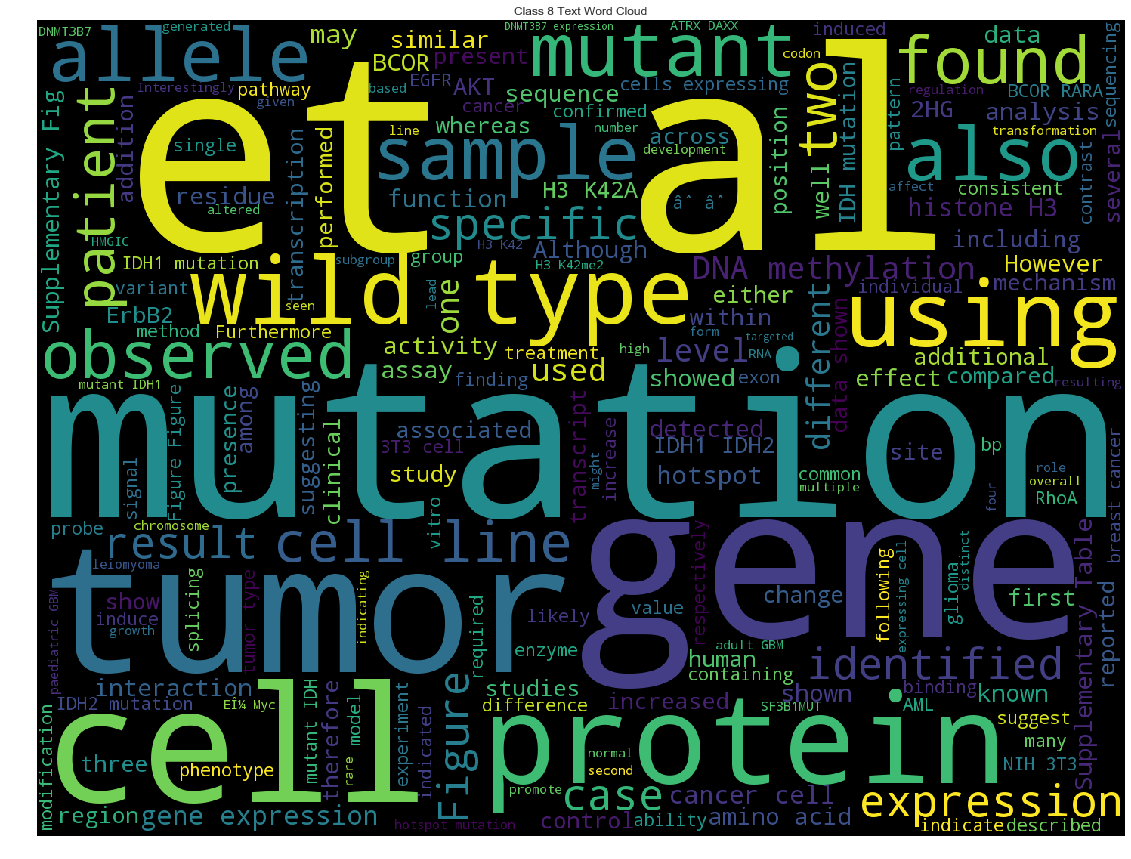

In [23]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_full[train_full.Class == 8]['Text']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Class 8 Text Word Cloud')

In [25]:
def tf(word, train_full):
    return blob.words.count(word) / len(blob.words)